# MATHENG 3L - Laboratory Activity 1
### Topic: Probability Distributions and Random Variables

## Learning Objectives
By the end of this lab, you will be able to:
1. Generate random variables from common discrete and continuous probability distributions using Python.
2. Compute theoretical and empirical probabilities for given random variables.
3. Visualize PMFs, PDFs, and (where appropriate) quick histograms.
4. Compare theoretical expectations (mean, variance) with simulated estimates.


## Pre-Lab (review before starting)
- Review definitions: random variable, PMF, PDF, and CDF.
- Recall formulas for mean and variance for: Binomial, Poisson, Hypergeometric, Negative Binomial, Normal, Exponential, Uniform.


In [ ]:
# Setup
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(2025)  # Reproducibility
print('Libraries loaded.')


---
## 1) Discrete Distributions
### 1.1 Binomial Distribution

A discrete probability distribution that models the number of successes in \(n\) independent Bernoulli trials, each with probability \(p\) of success.  

PMF:

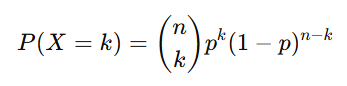

Mean = \(np\)  
Variance = \(np(1-p)\)

---
**Demonstration**

Parameters: n = 10, p = 0.4. Compute $P(X=4)$, theoretical mean/variance, verify by simulation, and plot the PMF.

In [ ]:
n, p = 10, 0.4
theory_p4 = stats.binom.pmf(4, n, p)
theory_mean, theory_var = stats.binom.stats(n, p, moments='mv')

sim = stats.binom.rvs(n, p, size=100_000)
emp_p4 = np.mean(sim == 4)
emp_mean, emp_var = np.mean(sim), np.var(sim, ddof=0)

print('P(X=4): theory =', theory_p4, ' empirical =', emp_p4)
print('Mean: theory =', theory_mean, ' empirical =', emp_mean)
print('Variance: theory =', theory_var, ' empirical =', emp_var)

x_vals = np.arange(0, n+1)
markerline, stemlines, baseline = plt.stem(x_vals, stats.binom.pmf(x_vals, n, p), use_line_collection=True)
plt.title('Binomial PMF (n=10, p=0.4)')
plt.xlabel('x'); plt.ylabel('P(X=x)')
plt.show()


**Task 1:**
- Change parameters to n = 8, p = 0.6.
- Compute P(X=5) theoretical vs. simulation.
- Compare theoretical mean/variance with simulated values.
- Plot the PMF.

In [ ]:
# Put your code here


### 1.2 Poisson Distribution
A discrete distribution describing the number of events occurring in a fixed interval of time or space, assuming events occur independently and at a constant average rate λ.

PMF:

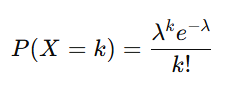

Mean = Variance = λ.

**Demonstration:**

Parameter: λ = 3. Compute $P(X \ge 5)$ using the Poisson distribution and verify by simulation; plot the PMF.

In [ ]:
lam = 3
theory_tail = stats.poisson.sf(4, lam)
sim = stats.poisson.rvs(lam, size=100_000)
emp_tail = np.mean(sim >= 5)
print('P(X >= 5): theory =', theory_tail, ' empirical =', emp_tail)
x_vals = np.arange(0, 12)
plt.stem(x_vals, stats.poisson.pmf(x_vals, lam), use_line_collection=True)
plt.title('Poisson PMF (λ=3)')
plt.xlabel('x'); plt.ylabel('P(X=x)'); plt.show()


**Task 2:**
- Set λ = 4.
- Compute P(X ≤ 2) theoretical vs. simulation.
- Plot the PMF.

In [ ]:
# Put your code here


### 1.3 Hypergeometric Distribution
A discrete distribution for the number of successes in \(N\) draws **without replacement** from a population of size \(M\) containing \(K\) successes.  

PMF

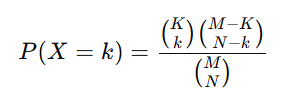

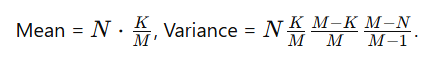

**Demonstration**

Population size M = 20, defectives K = 8, draws N = 5. Compute $P(X=2)$; verify by simulation; plot PMF.

In [ ]:
M, K, N = 20, 8, 5
theory_p2 = stats.hypergeom.pmf(2, M, K, N)
sim = stats.hypergeom.rvs(M, K, N, size=100_000)
emp_p2 = np.mean(sim == 2)
print('P(X=2): theory =', theory_p2, ' empirical =', emp_p2)
x = np.arange(0, N+1)
plt.stem(x, stats.hypergeom.pmf(x, M, K, N), use_line_collection=True)
plt.title('Hypergeometric PMF (M=20, K=8, N=5)')
plt.xlabel('x'); plt.ylabel('P(X=x)'); plt.show()


**Task 3:**
- Use M = 30, K = 12 defectives, N = 6 draws.
- Compute P(X=3) theoretical vs. simulation.
- Plot the PMF.

In [ ]:
# Put your code here


### 1.4 Negative Binomial Distribution
A discrete distribution giving the number of trials \(X\) needed to achieve \(r\) successes in independent Bernoulli trials with success probability \(p\).  

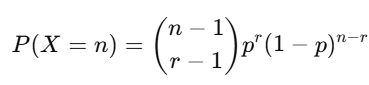

Mean = r/p
Variance = r(1-p)/p^2

**Demonstration**

Number of trials X needed to get r = 5 successes with p = 0.4. Compute P(X=8); verify by simulation; plot PMF.

*_Note:_ SciPy parameterization uses the number of failures (k) before achieving r successes. If X is the total trials, then k = X - r.*

In [ ]:
r, p = 5, 0.4
theory_p8 = stats.nbinom.pmf(8 - r, r, p)  # k = 8 - r failures before r successes
sim = stats.nbinom.rvs(r, p, size=100_000)
emp_p8 = np.mean(sim == (8 - r))
print('P(X=8): theory =', theory_p8, ' empirical =', emp_p8)
x_total = np.arange(r, r+10)
plt.stem(x_total, stats.nbinom.pmf(x_total - r, r, p), use_line_collection=True)
plt.title('Negative Binomial PMF (r=5, p=0.4)')
plt.xlabel('Number of Trials (X)'); plt.ylabel('P(X=x)'); plt.show()


**Task 4:**
- Set r = 4, p = 0.5.
- Compute P(X = 7) theoretical vs. simulation.
- Plot PMF.


In [1]:
# Put your code here



---
## 2) Continuous Distributions
### 2.1 Normal Distribution (Demo)
A continuous distribution characterized by its bell-shaped curve, defined by mean μ  and standard deviation σ.  

PDF:  
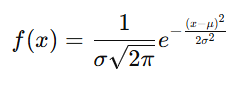

Mean = μ  
Variance = σ²

**Demonstration**

Parameters: μ = 50, σ = 10. Compute $P(45 \le X \le 60)$; verify by simulation; plot the PDF.

In [ ]:
mu, sigma = 50, 10
theory_p = stats.norm.cdf(60, mu, sigma) - stats.norm.cdf(45, mu, sigma)
sim = stats.norm.rvs(mu, sigma, size=100_000)
emp_p = np.mean((sim >= 45) & (sim <= 60))
print('P(45<=X<=60): theory =', theory_p, ' empirical =', emp_p)
x_vals = np.linspace(mu - 4*sigma, mu + 4*sigma, 300)
plt.plot(x_vals, stats.norm.pdf(x_vals, mu, sigma))
plt.title('Normal PDF (μ=50, σ=10)')
plt.xlabel('x'); plt.ylabel('f(x)'); plt.show()


**Task 5:**
- Set μ = 100, σ = 15.
- Compute P(90 ≤ X ≤ 120) theoretical vs. simulation.
- Plot the PDF.

In [ ]:
# Put your code here


### 2.2 Exponential Distribution
A continuous distribution that models the time between events in a Poisson process with rate parameter
λ.

PDF:

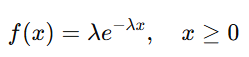

Mean = 1/λ Variance = 1/λ²

**Demonstration**

Parameter: λ = 0.2 (mean = 5). Compute $P(X>8)$; verify by simulation; plot the PDF.

In [ ]:
lam = 0.2
theory_p = stats.expon.sf(8, scale=1/lam)
sim = stats.expon.rvs(scale=1/lam, size=100_000)
emp_p = np.mean(sim > 8)
print('P(X>8): theory =', theory_p, ' empirical =', emp_p)
x_vals = np.linspace(0, 30, 300)
plt.plot(x_vals, stats.expon.pdf(x_vals, scale=1/lam))
plt.title('Exponential PDF (λ=0.2)')
plt.xlabel('x'); plt.ylabel('f(x)'); plt.show()


**Task 6:**
- Set λ = 0.5 (mean = 2).
- Compute P(X < 3) theoretical vs. simulation.
- Plot the PDF.

In [ ]:
# Put your code here


### 2.3 Uniform Distribution

A continuous distribution where all values in [a, b] are equally likely.

PDF

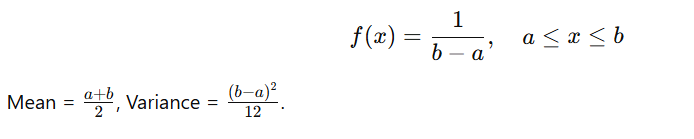

**Demonstration**

Interval: [2, 10]. Compute $P(4 \le X \le 7)$; verify by simulation; plot the PDF.

In [ ]:
a, b = 2, 10
theory_p = stats.uniform.cdf(7, a, b-a) - stats.uniform.cdf(4, a, b-a)
sim = stats.uniform.rvs(loc=a, scale=b-a, size=100_000)
emp_p = np.mean((sim >= 4) & (sim <= 7))
print('P(4<=X<=7): theory =', theory_p, ' empirical =', emp_p)
x_vals = np.linspace(a-1, b+1, 300)
plt.plot(x_vals, stats.uniform.pdf(x_vals, a, b-a))
plt.title('Uniform PDF [2, 10]')
plt.xlabel('x'); plt.ylabel('f(x)'); plt.show()


**Task 7:**
- Set interval [5, 15].
- Compute P(8 ≤ X ≤ 12) theoretical vs. simulation.
- Plot the PDF.

In [1]:
# Put your code here


## Guide Questions (Answer concisely)
---
1. In the **Binomial** demo, when you changed parameters to n=8, p=0.6, how did the PMF's shape shift compared to n=10, p=0.4? Relate this to the mean np and variance np(1-p).



In [ ]:
# Put your answer here, enclosed in "#"

2. For **Poisson**, compare the tail probabilities P(X≥5) at λ=3 and the cumulative P(X≤2) at λ=4. How does λ influence the skewness and spread?

In [ ]:
# Put your answer here, enclosed in "#"

3. In **Hypergeometric**, explain how changing (M, K, N) affects the support and probabilities versus the Binomial with p = K/M. Why do these models differ conceptually?


In [ ]:
# Put your answer here, enclosed in "#"

4. For **Negative Binomial**, clarify the meaning of X in this notebook (total trials to achieve r successes). How does increasing r (holding p fixed) affect the PMF?



In [ ]:
# Put your answer here, enclosed in "#"

5. In the **Normal Distribution** , discuss the empirical vs. theoretical probability differences. What role does the choice of interval (e.g., ±1σ, ±2σ) play?

In [ ]:
# Put your answer here, enclosed in "#"

6. For the **Exponential**, interpret the “memoryless” property using your simulation results. How would this differ from the Normal or Uniform distributions?

In [ ]:
# Put your answer here, enclosed in "#"

7. For the **Uniform**, why is the PDF constant and how is this reflected in the probabilities you computed? If the interval length doubles, what happens to P(a ≤ X ≤ b) for a fixed-length sub-interval?


In [ ]:
# Put your answer here, enclosed in "#"

8. Across all distributions, when do you expect the empirical estimates to deviate more from theory? Comment on the role of the number of simulations and the event's probability (very small/large).

In [ ]:
# Put your answer here, enclosed in "#"